# Introduction

## 1.4.1 Example Carbon Dioxide Emissions in European Nations

In [44]:
import pandas as pd
Carbon = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Carbon.dat', sep=r'\s+')

In [45]:
Carbon.shape

(31, 2)

In [46]:
Carbon.columns

Index(['Nation', 'CO2'], dtype='object')

In [47]:
Carbon.head()

,Nation,CO2
0,Albania,2.0
1,Austria,6.9
2,Belgium,8.3
3,Bosnia,6.2
4,Bulgaria,5.9


### 1.4.2 Frecuency distribution

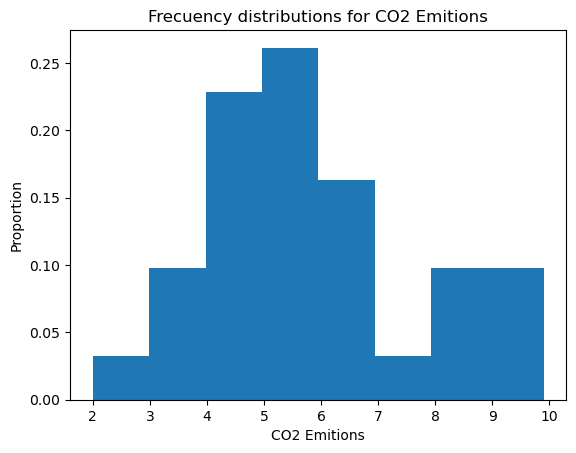

In [48]:
import matplotlib.pyplot as plt
plt.hist(Carbon['CO2'], density=True, bins=8) # density=True muestra la frecuencia relativa
plt.xlabel('CO2 Emitions')
plt.ylabel('Proportion')
plt.title('Frecuency distributions for CO2 Emitions')
plt.show()

### 1.4.5 Describing positions

In [49]:
Carbon.describe()

,CO2
count,31.000000
mean,5.819355
std,1.964929
min,2.000000
25%,4.350000
50%,5.400000
75%,6.700000
max,9.900000


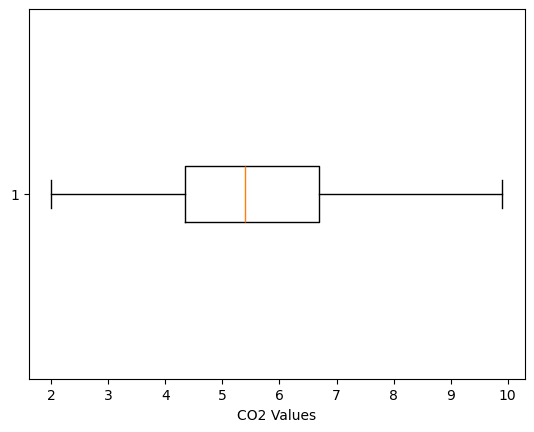

In [50]:
fig1, ax1 = plt.subplots()
plt.xlabel('CO2 Values')
plt.boxplot(Carbon['CO2'], vert=False)
plt.show()

Here is a side by side boxplot:

In [51]:
crime = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Murder2.dat', sep=r'\s+')

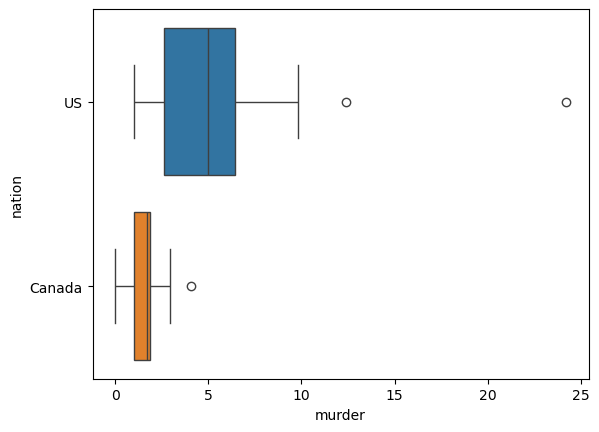

In [52]:
import seaborn as sns
sns.boxplot(x='murder', y='nation', hue='nation', data=crime, orient='h')
plt.show()

In [53]:
crime.groupby('nation')['murder'].describe()

,count,mean,std,min,25%,50%,75%,max
nation,,,,,,,,
Canada,10.0,1.673000,1.184437,0.0,1.03,1.735,1.875,4.07
US,51.0,5.252941,3.725391,1.0,2.65,5.000,6.450,24.20


## 1.5 Descriptive statistics: multivariate data

### 1.5.1 Bivariate Quantitive Data

In [54]:
gs = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Guns_Suicide.dat', sep=r'\s+')

In [55]:
gs.head()

,state,guns,suicide
0,AK,60.6,23.3
1,AL,57.2,14.9
2,AR,58.3,17.4
3,AZ,36.2,17.6
4,CA,19.5,10.5


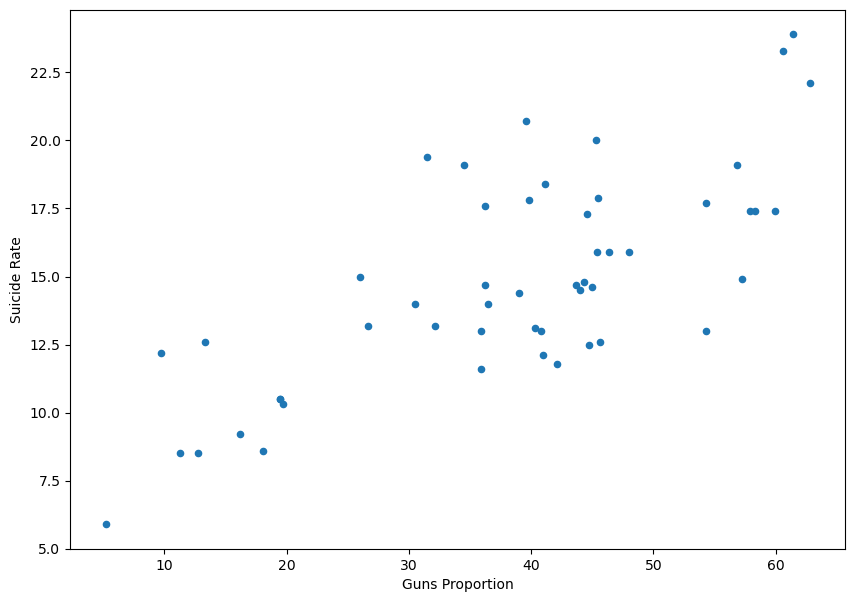

In [56]:
gs.plot(kind='scatter', x='guns', y='suicide', figsize=(10,7))
plt.xlabel('Guns Proportion')
plt.ylabel('Suicide Rate')
plt.show()

In [57]:
gs[['guns', 'suicide']].corr()

,guns,suicide
guns,1.000000,0.738667
suicide,0.738667,1.000000


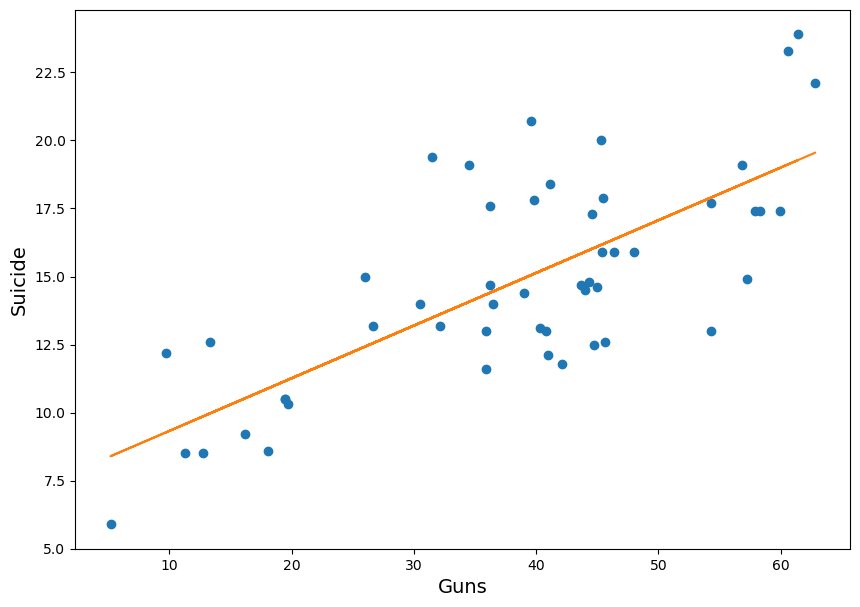

In [58]:
import numpy as np
coef = np.polyfit(gs['guns'], gs['suicide'], 1)
LN_fn = np.poly1d(coef)
plt.figure(figsize=(10,7))
plt.plot(gs['guns'], gs['suicide'], 'o', gs['guns'], LN_fn(gs['guns']))
plt.xlabel('Guns', size=14)
plt.ylabel('Suicide', size=14)
plt.show()

## Statsmodels vs SK-learn

In [59]:
import statsmodels.formula.api as sm
mod = sm.ols(formula='suicide ~ guns', data=gs).fit()

In [60]:
print(LN_fn)
print(mod.params)

 
0.1936 x + 7.39
Intercept    7.390080
guns         0.193565
dtype: float64


In [78]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                suicide   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     58.84
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           6.11e-10
Time:                        11:31:06   Log-Likelihood:                -121.12
No. Observations:                  51   AIC:                             246.2
Df Residuals:                      49   BIC:                             250.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3901      1.037      7.125      0.000       5.306       9.474
guns           0.1936      0.025      7.671      0.000       0.143       0.244
==============================================================================
Omnibus:                        2.959   Durbin-Watson:                   2.314
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                2.820
Skew:                           0.525   Prob(JB):                        0.244
Kurtosis:                       2.527   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(gs['guns'].values.reshape(-1,1), gs['suicide'].values.reshape(-1,1))

LinearRegression()

In [65]:
print(regressor.intercept_)
print(regressor.coef_)

[7.39008028]
[[0.19356459]]


### 1.5.2 Bivariate Categorical Data: contingency tables

In [79]:
pid = pd.read_csv('https://stat4ds.rwth-aachen.de/data/PartyID.dat', sep=r'\s+')

In [84]:
pid_table = pd.crosstab(pid['race'], pid['id'], margins=False)
pid_table

id,Democrat,Independent,Republican
race,,,
black,281,65,30
other,124,77,52
white,633,272,704


In [91]:
from scipy.stats.contingency import margins # Encontrar marginales
mr, mc = margins(pid_table)

La tabla de probabilidad nos indica la ocurrencia relativa de cada combinación posible dentro del total de observaciones:

In [128]:
probtable = pid_table/mc.sum() # Tabla de probabilidad
probtable

id,Democrat,Independent,Republican
race,,,
black,0.125559,0.029044,0.013405
other,0.055407,0.034406,0.023235
white,0.282842,0.121537,0.314567


La tabla de probabilidad condicional por renglón nos indica la ocurrencia relativa de cada columna **dentro de cada renglón**. P. ej., es más probable observar demócratas a personas de raza negra, con una probabilidad de 0.74.

In [132]:
probtable1 = pid_table / mr
probtable1

id,Democrat,Independent,Republican
race,,,
black,0.747340,0.172872,0.079787
other,0.490119,0.304348,0.205534
white,0.393412,0.169049,0.437539


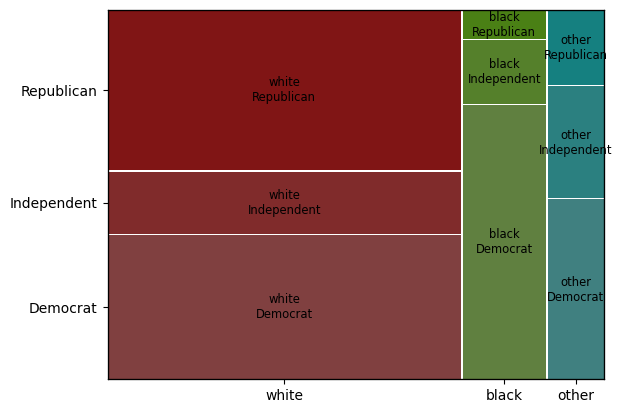

In [90]:
from statsmodels.graphics.mosaicplot import mosaic
fig, _ = mosaic(pid, index=['race', 'id'])

### 1.5.3 Descriptive statistics for samples and populations

El siguiente ejemplo nos muestra cómo varían los estadísticos para una misma población, es decir, son variables. Construimos una distribución de números con una media poblacional de 100 y una desviación estándar poblacional de 16, luego tomamos muestras de 30 ejemplares.

In [133]:
μ, σ = 100, 16

In [136]:
y1 = np.random.normal(μ, σ, 30)
y1.mean(), y1.std()

(103.26531145542911, 13.61887093110871)

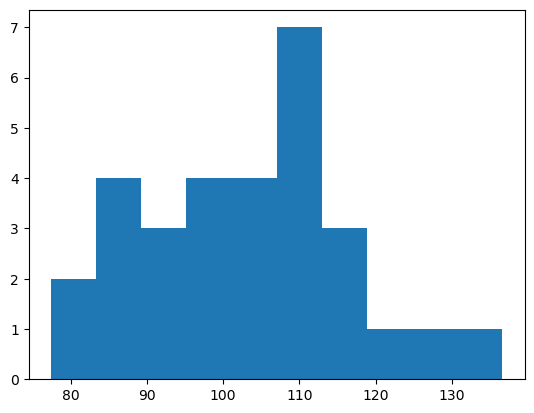

In [138]:
plt.hist(y1)
plt.show()

In [140]:
y2 = np.random.normal(μ, σ, 30)
y2.mean(), y2.std()

(95.0110720322658, 12.983126283477445)

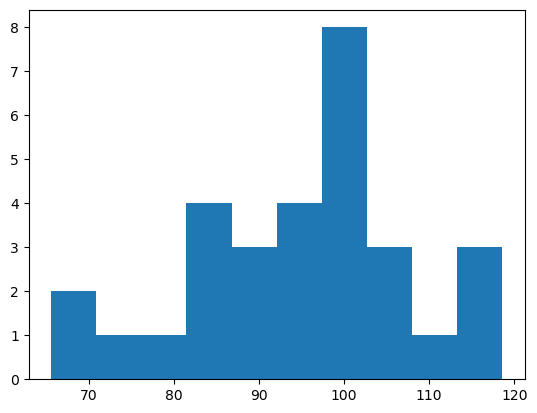

In [141]:
plt.hist(y2)
plt.show()

Cuando tomamos muestras de mayor tamaño, es decir, cuando $n$ aumenta, la distribución varía en menor medida.